<a href="https://colab.research.google.com/github/surbhi-sharma99/python/blob/master/Copy_of_fashion_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_data = keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test)= fashion_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
y_train


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

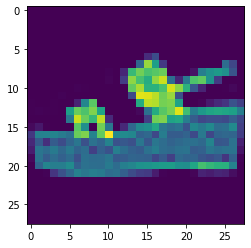

In [ ]:
plt.imshow(x_train[12])


In [ ]:
#Normalize our image
x_train, x_test = x_train / 255.0 , x_test / 255.0
x_train, x_test = x_train.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)
#changing y to one-hot
from keras.utils.np_utils import to_categorical
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

Using TensorFlow backend.


In [ ]:
image_shape = x_test.shape
image_shape, x_train.shape

((10000, 28, 28, 1), (60000, 28, 28, 1))

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
model =Sequential()

model.add( Conv2D(64,(3,3), activation="relu", padding = 'valid', input_shape= image_shape[1:] ))
model.add( Conv2D(128, (3,3), activation="relu" ) )
model.add( MaxPool2D(  (2,2) ) )

model.add( Dense(128, activation='relu') )
model.add( Dense(128, activation='relu') )

model.add( Flatten(input_shape=(28,28) ) )
model.add( Dense(128, activation='relu') )
model.add( Dense(10, activation='relu') )



In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7338 - accuracy: 0.3532
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.3715 - accuracy: 0.4491
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.3382 - accuracy: 0.4573
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.3164 - accuracy: 0.4616
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.3019 - accuracy: 0.4656


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.3533 - accuracy: 0.4535


[1.353294014930725, 0.45350000262260437]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dense (Dense)                (None, 6, 6, 1000)        65000     
_________________________________________________________________
dense_1 (Dense)              (None, 6, 6, 500)         500500    
_________________________________________________________________
flatten (Flatten)            (None, 18000)             0